In [33]:
import numpy as np
from tensorflow.keras import (
    datasets, 
    utils,
    layers,
    models,
    optimizers
)
import matplotlib.pyplot as plt

In [ ]:
NUM_CLASSES= 10

# DOWNLOAD CIFAR-10

In [8]:
# Load CIFAR-10 Dataset
# x_train and x_test are numpy arrays of shape [50000,32,32,3] and [10000,32,32,3]
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# PREPARE DATA

In [10]:
# Scale each image so that the pixel channel values lie between 0 and 1
# instead of passing pixel values from 0–255 into the input layer, we usually scale these values to between –1 and 1.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels-the new shapes [50000,10]
y_train= utils.to_categorical(y_train,NUM_CLASSES)
y_test= utils.to_categorical(y_test, NUM_CLASSES)

In [12]:
# Get a green channel value of pixel 12,13 in image number 54
x_train[54,12,13,1]

0.36862746

# BUILDING SEQUENTIAL MODEL

In [19]:
model = models.Sequential(
    [
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(200, activation='relu'),
        layers.Dense(150, activation='relu'),
        layers.Dense(10,activation='softmax')
    ]
)

# BUIDING FUNCTIONAL-API MODEL

This is built on top of the sequential model because, functional api type is preffered due to the higher flexibility in production environemt

In [20]:
input_layer = layers.Input(shape=(32,32,3))
x= layers.Flatten()(input_layer)
x= layers.Dense(units=200,activation='relu')(x)
x= layers.Dense(units=150,activation='relu')(x)
output_layer= layers.Dense(units=10,activation='softmax')(x)
model=models.Model(input_layer,output_layer)

In [22]:
# Inspecting the mmodel
# each unit within a given layer is also connected to one additional bias
# unit that always outputs 1. This ensures that the output from the unit
# can still be nonzero even when all inputs from the previous layer are 0.
# Therefore, the number of parameters in the 200-unit Dense layer is
# 200 * (3,072 + 1) = 614,600.

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

# COMPILING THE MODEL

In [24]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Categorical cross-entropy
$$
\sum_{i=1}^{n} y_i \log(p_i)
$$

# TRANING THE MODEL

In [26]:
model.fit(x_train,
         y_train,
         batch_size=32,
         epochs=10,
         shuffle=True)

Epoch 1/10


I0000 00:00:1726657191.844620    2123 service.cc:145] XLA service 0x7f1c8000a7b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726657191.844669    2123 service.cc:153]   StreamExecutor device (0): NVIDIA T1200 Laptop GPU, Compute Capability 7.5
2024-09-18 21:59:51.886629: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-18 21:59:52.034221: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 112/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1758 - loss: 2.2476

I0000 00:00:1726657192.986839    2123 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2904 - loss: 1.9671
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3945 - loss: 1.6912
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4297 - loss: 1.6013
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - accuracy: 0.4534 - loss: 1.5265
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4674 - loss: 1.4877
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4752 - loss: 1.4611
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4882 - loss: 1.4351
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4981 - loss: 1.4038
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5067 - loss: 1.3747
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5165 - loss: 1.3576


# EVALUATE MODEL

In [28]:
# The outpuit will be a list of the metrics we are monitoring: categorical cross-entropy and accuracy
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4656 - loss: 1.5345


[1.5317461490631104, 0.4652000069618225]

The model accuracy is 46%. Note that if the model were guessing randomly, it would achieve approximately 10% accuracy
(because there are 10 classes), so 46.0% is a good result

# TEST MODEL

In [29]:
CLASSES = np.array(
    [
        'airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck'
    ]
)

In [32]:
# preds is an array of shape [10000, 10]—i.e., a vector of 10 class probabilities for each observation.
# We convert this array of probabilities back into a single prediction using numpy’s argmax function. 
# Here, axis =–1 tells the function to collapse the array over the last dimension (the classes dimension), 
# so that the shape of preds_single is then [10000, 1].
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds,axis=-1)]
actual_single = CLASSES[np.argmax(y_test,axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step


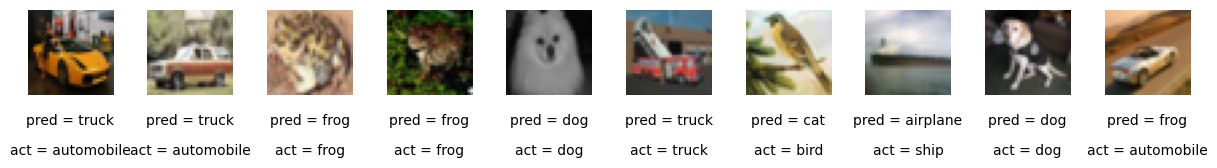

In [37]:
n_to_show=10
indices= np.random.choice(range(len(x_test)), n_to_show)

fig= plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1,n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5,-0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

**SUMMARY**

One of the reasons our network isn’t yet performing as well
as it might is because there isn’t anything in the network
that takes into account the spatial structure of the input
images. In fact, our first step is to flatten the image into a
single vector, so that we can pass it to the first Dense layer!